In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# Load the CSV file to check its content
df = pd.read_csv('timediff.CSV')

# Display the first few rows of the dataframe to understand its structure
df.head()


,IDs,Pure Durations,K,Speed Set,Version,Total Time,One file
0,28_150947,598.61,Yes,100000,v1alert,844,No
1,28_163451,626.98,No,100000,v1alert,664,No
2,28_123904,2135.73,Yes,10000,v1,-,No
3,28_145136,622.64,Yes,10000,v1alert,850,No
4,28_092832,2325.45,Yes,1000,v1,-,No


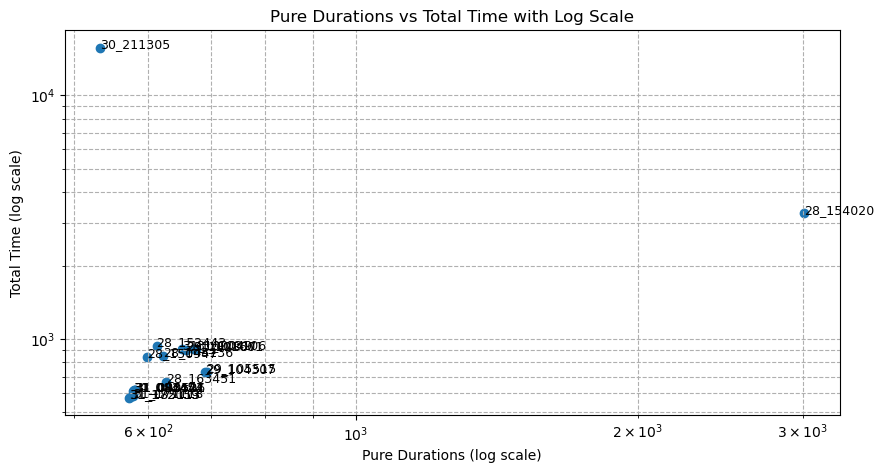

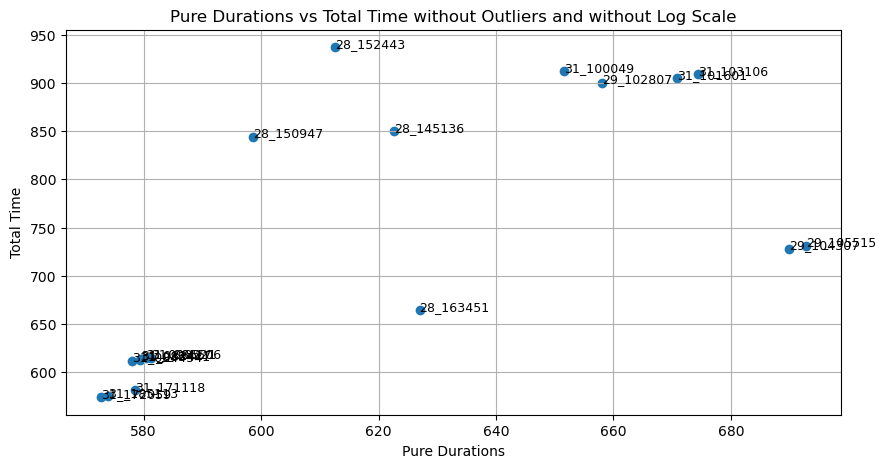

In [2]:
# Replace '-' with NaN in 'Total Time' column and convert it to numeric
df['Total Time'] = pd.to_numeric(df['Total Time'], errors='coerce')

# Remove entries with 'None' in 'Total Time' for both plots
df = df.dropna(subset=['Total Time'])

# First plot with log scale
plt.figure(figsize=(10, 5))
plt.scatter(df['Pure Durations'], df['Total Time'])
plt.xscale('log')
plt.yscale('log')
plt.title('Pure Durations vs Total Time with Log Scale')
plt.xlabel('Pure Durations (log scale)')
plt.ylabel('Total Time (log scale)')
plt.grid(True, which="both", ls="--")

# Annotate each point with its ID
for i, row in df.iterrows():
    plt.text(row['Pure Durations'], row['Total Time'], str(row['IDs']), fontsize=9)

# Show the first plot
plt.show()

# Second plot without log scale
# First, remove the outliers for the second plot
outliers_to_remove = ['30_211305', '28_154020']
df_no_outliers = df[~df['IDs'].isin(outliers_to_remove)]

plt.figure(figsize=(10, 5))
plt.scatter(df_no_outliers['Pure Durations'], df_no_outliers['Total Time'])
plt.title('Pure Durations vs Total Time without Outliers and without Log Scale')
plt.xlabel('Pure Durations')
plt.ylabel('Total Time')
plt.grid(True)

# Annotate each point with its ID
for i, row in df_no_outliers.iterrows():
    plt.text(row['Pure Durations'], row['Total Time'], str(row['IDs']), fontsize=9)

# Show the second plot
plt.show()


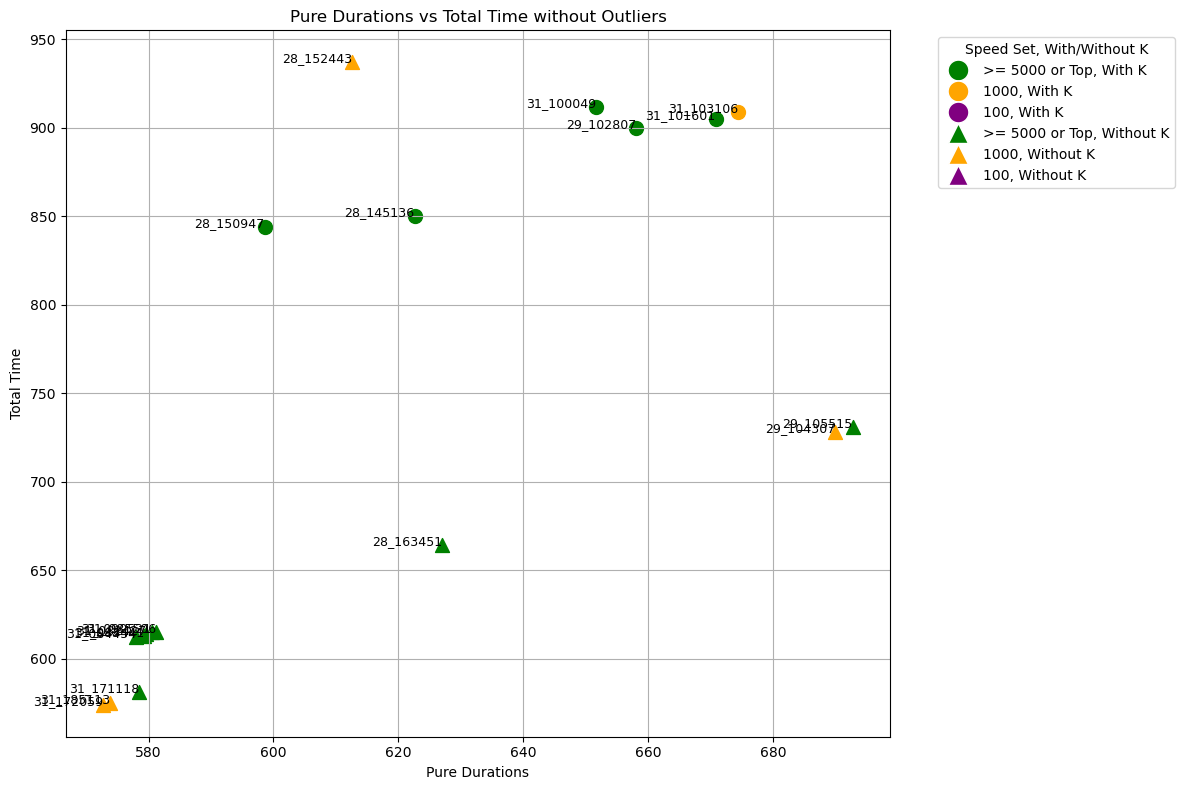

In [3]:
# Assign color based on 'Speed Set'
def reassign_color(speed_set):
    if speed_set >= 5000:  # Including 'Top' treated as 50000
        return 'green'
    elif speed_set == 1000:
        return 'orange'
    elif speed_set == 100:
        return 'purple'
    else:
        return 'gray'

# 使用.copy()避免SettingWithCopyWarning
df_no_outliers_modified = df_no_outliers.copy()

# 对Speed Set进行替换和类型转换
df_no_outliers_modified['Speed Set'] = df_no_outliers_modified['Speed Set'].replace('Top', 50000).astype(int)

# 重新分配颜色
df_no_outliers_modified['Color'] = df_no_outliers_modified['Speed Set'].apply(reassign_color)

updated_markers = {'Yes': 'o', 'No': '^'}  # Circle for "Yes", Triangle for "No"
colors_corrected = {'green': '>= 5000 or Top', 'orange': '1000', 'purple': '100'}

plt.figure(figsize=(12, 8))

# Plotting points with annotations, ensuring ID 1055 is included
for k_value, marker in updated_markers.items():
    for color_value, speed_label in colors_corrected.items():
        df_filtered = df_no_outliers_modified[(df_no_outliers_modified['K'] == k_value) & (df_no_outliers_modified['Color'] == color_value)]
        plt.scatter(df_filtered['Pure Durations'], df_filtered['Total Time'], color=color_value, marker=marker, s=100,
                    label=f'{speed_label}, K: {k_value}')

        # Annotating points with IDs
        for _, row in df_filtered.iterrows():
            plt.text(row['Pure Durations'], row['Total Time'], str(row['IDs']), fontsize=9, ha='right')
            
custom_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=15, label='>= 5000 or Top, With K'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=15, label='1000, With K'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=15, label='100, With K'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=15, label='>= 5000 or Top, Without K'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='orange', markersize=15, label='1000, Without K'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='purple', markersize=15, label='100, Without K')
]

# Correcting the legend to ensure it matches the plot markers
plt.legend(handles=custom_handles, title='Speed Set, With/Without K', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Pure Durations vs Total Time without Outliers')
plt.xlabel('Pure Durations')
plt.ylabel('Total Time')
plt.grid(True)
plt.tight_layout()

plt.show()
